<a href="https://colab.research.google.com/github/abhi-lejon/Machine-learning/blob/master/CORONA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point,Polygon
import descartes
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import folium 
from folium import plugins

In [0]:
df=pd.read_csv(r'/content/covid_19_clean_complete.csv')

In [7]:
df.shape

(19220, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
Province/State    8432 non-null object
Country/Region    19220 non-null object
Lat               19220 non-null float64
Long              19220 non-null float64
Date              19220 non-null object
Confirmed         19219 non-null float64
Deaths            19219 non-null float64
Recovered         19219 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.00,101.00,1/22/20,2.00,0.00,0.00
1,NaN,Japan,36.00,138.00,1/22/20,2.00,0.00,0.00
2,NaN,Singapore,1.28,103.83,1/22/20,0.00,0.00,0.00
3,NaN,Nepal,28.17,84.25,1/22/20,0.00,0.00,0.00
4,NaN,Malaysia,2.50,112.50,1/22/20,0.00,0.00,0.00


In [0]:
##df.columns = df.columns.str.replace(r'\n','', regex=True)

df.rename(columns={'Country/Region':'Country','Province/State':'Province'},inplace=True)

In [10]:
df.columns

Index(['Province', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

NO of cases per day


In [12]:


df_per_day=df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum() # max for that particular day

df_per_day.head()

df_per_day.describe()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,554.00,17.00,28.00
1/23/20,652.00,18.00,30.00
1/24/20,939.00,26.00,36.00
1/25/20,1432.00,42.00,39.00
1/26/20,2113.00,56.00,52.00


,Confirmed,Deaths,Recovered
count,62.00,62.00,62.00
mean,89193.08,3173.61,31948.90
std,80809.05,3519.85,32130.89
min,554.00,17.00,28.00
25%,31699.50,655.25,1618.00
50%,77686.00,2354.50,20883.00
75%,108378.50,3721.00,60103.00
max,336004.00,14643.00,98334.00


In [17]:
# The total confirmed cases, deaths and recovered can be seen here
df_per_day['Confirmed'].max(), df_per_day['Deaths'].max(), df_per_day['Recovered'].max()

(336004.0, 14643.0, 98334.0)

In [14]:
# date for max case
df_per_day['Confirmed'].idxmax()
df_per_day['Deaths'].idxmax()
df_per_day['Recovered'].idxmax()

'3/23/20'

'3/23/20'

'3/23/20'

In [20]:
##We can observe from above the Recovering cases are increasing, hope we see end of corona soon. this update is till 3/20/20

# min no of cases
df_per_day['Confirmed'].min(), 
df_per_day['Deaths'].min(), 
df_per_day['Recovered'].min() 

(554.0,)

(17.0,)

28.0

In [19]:
# date for min case
df_per_day['Confirmed'].idxmin()
df_per_day['Deaths'].idxmin()
df_per_day['Recovered'].idxmin()

'1/22/20'

'1/22/20'

'1/22/20'

In [26]:
##Number of cases per country

#pd.set_option('display.max_rows', 50000)

df.groupby(['Country'])[['Confirmed','Deaths','Recovered']].max()

,Confirmed,Deaths,Recovered
Country,,,
Afghanistan,40.00,1.00,1.00
Albania,89.00,2.00,2.00
Algeria,201.00,17.00,65.00
Andorra,113.00,1.00,1.00
Angola,2.00,0.00,0.00
Antigua and Barbuda,1.00,0.00,0.00
Argentina,225.00,4.00,3.00
Armenia,194.00,0.00,2.00
Australia,533.00,6.00,70.00


In [25]:
df.groupby(['Province','Country'])[['Confirmed','Deaths','Recovered']].max()

,,Confirmed,Deaths,Recovered
Province,Country,,,
Alabama,US,138.00,0.00,0.00
Alaska,US,21.00,0.00,0.00
Alberta,Canada,259.00,1.00,0.00
Anhui,China,990.00,6.00,984.00
Arizona,US,152.00,2.00,1.00
Arkansas,US,165.00,0.00,0.00
Aruba,Netherlands,8.00,0.00,0.00
Australian Capital Territory,Australia,19.00,0.00,0.00
Beijing,China,522.00,8.00,400.00


In [27]:
#df['Country'].value_counts()  #value_counts gives the records corresponding to each countries from starting day to current day.

#How many countries are affected
df['Country'].unique()
df['Country'].nunique()


array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

183

In [28]:
#df['Country'].value_counts().plot(kind='bar',figsize=(25,25))

### Checking distribution on map

##First step is to convert data to geodataframe

points=[Point(x,y) for x,y in zip(df['Long'],df['Lat'])]

gdp01=gdp.GeoDataFrame(df,geometry=points)
gdp01.head(2)

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Thailand,15.00,101.00,1/22/20,2.00,0.00,0.00,POINT (101.00000 15.00000)
1,NaN,Japan,36.00,138.00,1/22/20,2.00,0.00,0.00,POINT (138.00000 36.00000)


(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

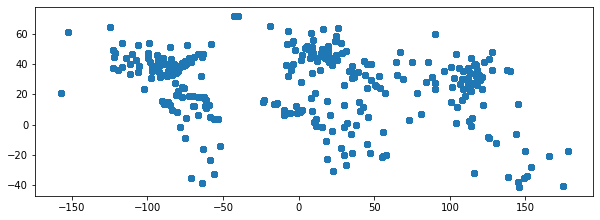

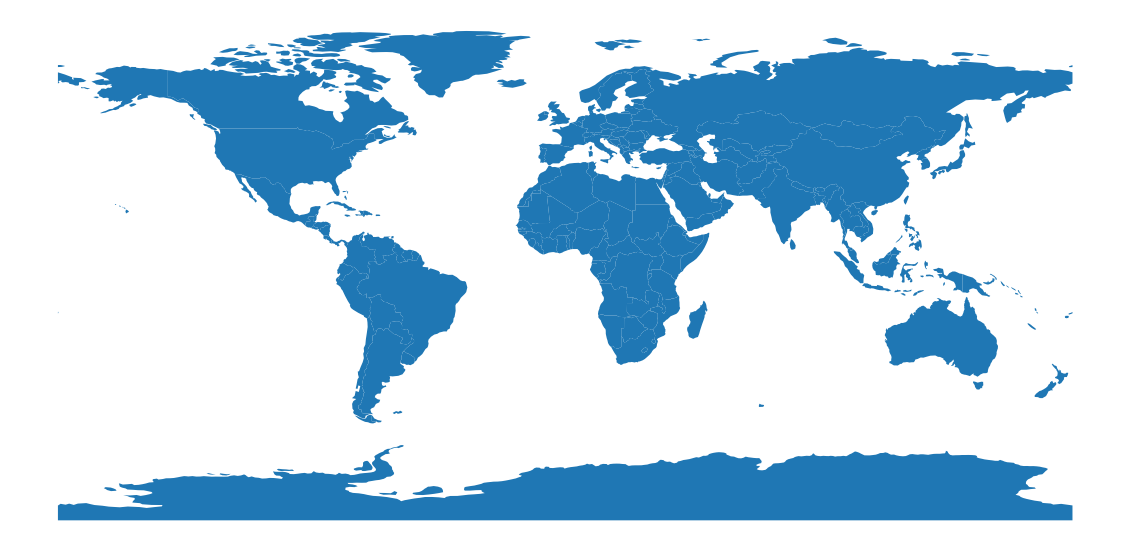

In [29]:
#map plot
gdp01.plot(figsize=(10,20))

# overlapping with world map
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

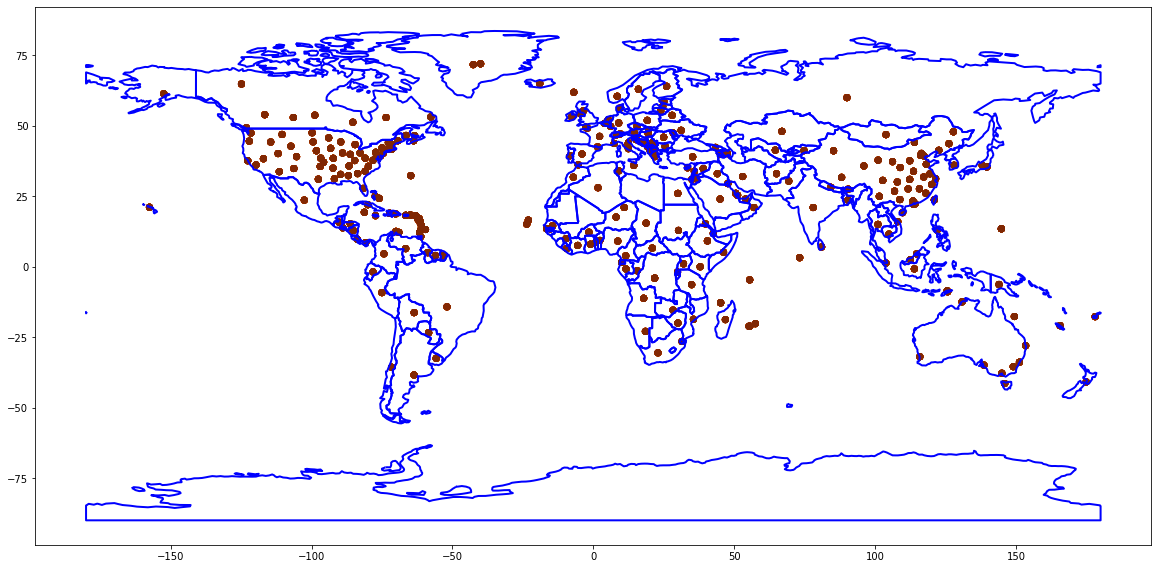

In [31]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdp01.plot(cmap='Oranges',ax=ax)
world.geometry.boundary.plot(color='Blue',edgecolor='k',linewidth=2,ax=ax)

#gdp01[gdp01['Country']=='Sweden']

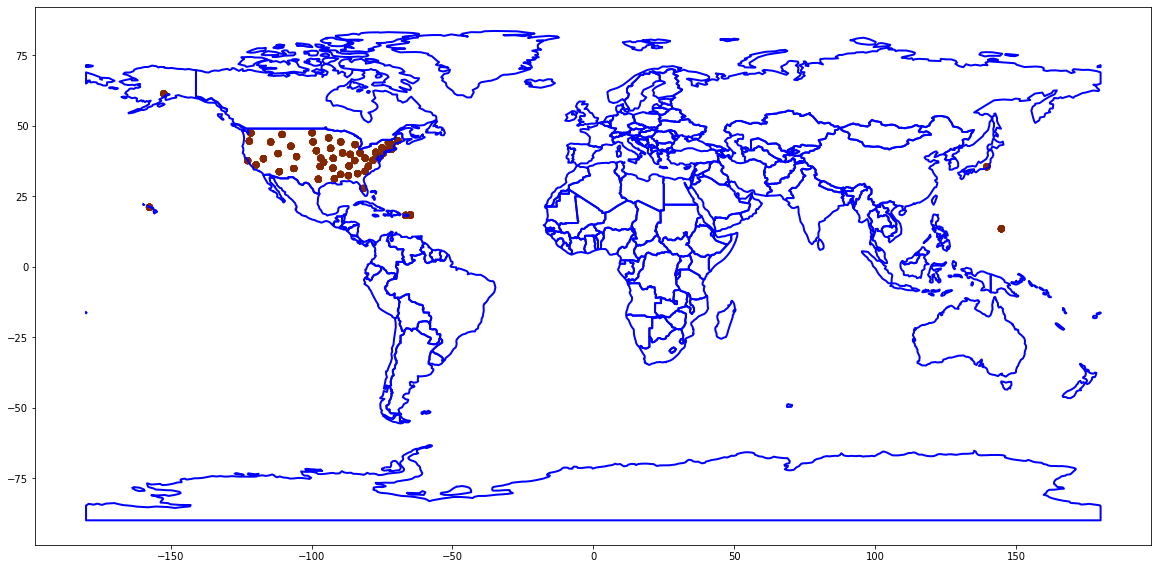

In [32]:
# Overlap
fig,ax = plt.subplots(figsize=(20,10))
gdp01[gdp01['Country']=='US'].plot(cmap='Oranges',ax=ax)
world.geometry.boundary.plot(color='Blue',edgecolor='k',linewidth=2,ax=ax)

In [33]:
df_per_day['Confirmed'].max()

336004.0

In [34]:
print('Confirmed Cases around the globe : ',df_per_day['Confirmed'].max())
print('Deaths Confirmed around the globe: ',df_per_day['Deaths'].max())
print('Recovered Cases around the globe : ',df_per_day['Recovered'].max())

Confirmed Cases around the globe :  336004.0
Deaths Confirmed around the globe:  14643.0
Recovered Cases around the globe :  98334.0


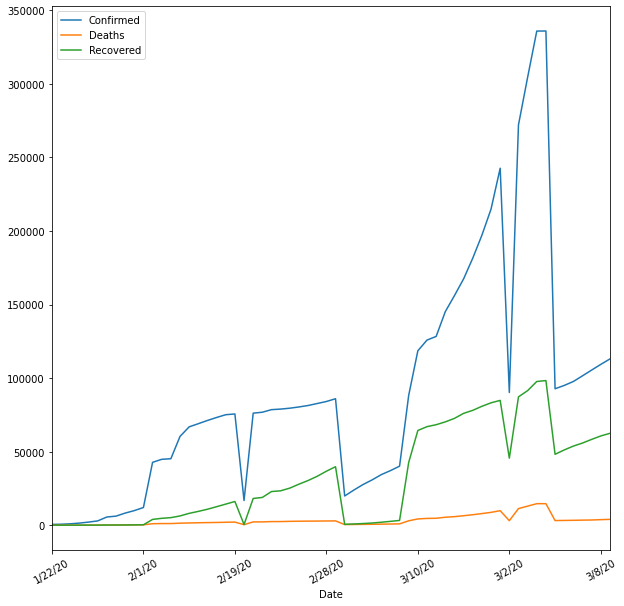

In [35]:

#Day wise distribution for confirmed, death and recovered

df_per_day.reset_index(inplace=True)

df_per_day.plot('Date',['Confirmed','Deaths','Recovered'],figsize=(10,10),rot=30)

In [0]:
##Global spread over time
Date_data=df[['Date','Confirmed','Deaths','Recovered']]

def scatterPlotCasesOverTime(df, country):
    plot = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Deaths", "Recovered"))

    subPlot1 = go.Scatter(
                    x=df['Date'],
                    y=df['Confirmed'],
                    name="Confirmed",
                    line_color='orange',
                    opacity=0.8)

    subPlot2 = go.Scatter(
                    x=df['Date'],
                    y=df['Deaths'],
                    name="Deaths",
                    line_color='red',
                    opacity=0.8)

    subPlot3 = go.Scatter(
                    x=df['Date'],
                    y=df['Recovered'],
                    name="Recovered",
                    line_color='green',
                    opacity=0.8)

    plot.append_trace(subPlot1, 1, 1)
    plot.append_trace(subPlot2, 1, 2)
    plot.append_trace(subPlot3, 1, 3)
    plot.update_layout(template="ggplot2", title_text = country + '<b> - Spread of the nCov Over Time</b>')

    plot.show()


In [37]:
global_data_over_time = Date_data.groupby('Date')['Confirmed','Deaths','Recovered'].sum().reset_index()
scatterPlotCasesOverTime(global_data_over_time, "<b>Global</b>")


In [38]:
def dailyreportedcasesovertime(df,country):
    #confirmed
    fig = px.bar(df, x="Date", y="Confirmed")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of confirmed cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Confirmed cases")

    fig.update_layout(layout)
    fig.show()
    fig = px.bar(df, x="Date", y="Deaths")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of Death cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Death cases")

    fig.update_layout(layout)
    fig.show()
    fig = px.bar(df, x="Date", y="Recovered")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of Recovered cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Recovered cases")

    fig.update_layout(layout)
    fig.show()

dailyreportedcasesovertime(global_data_over_time,'all over the world')

In [39]:

df[df['Country']=='China']

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
154,Hubei,China,30.98,112.27,1/22/20,444.00,17.00,28.00,POINT (112.27070 30.97560)
158,Guangdong,China,23.34,113.42,1/22/20,26.00,0.00,0.00,POINT (113.42440 23.34170)
159,Henan,China,33.88,113.61,1/22/20,5.00,0.00,0.00,POINT (113.61400 33.88200)
160,Zhejiang,China,29.18,120.09,1/22/20,10.00,0.00,0.00,POINT (120.09340 29.18320)
161,Hunan,China,27.61,111.71,1/22/20,4.00,0.00,0.00,POINT (111.70880 27.61040)
162,Anhui,China,31.83,117.23,1/22/20,1.00,0.00,0.00,POINT (117.22640 31.82570)
163,Jiangxi,China,27.61,115.72,1/22/20,2.00,0.00,0.00,POINT (115.72210 27.61400)
164,Shandong,China,36.34,118.15,1/22/20,2.00,0.00,0.00,POINT (118.14980 36.34270)
166,Jiangsu,China,32.97,119.45,1/22/20,1.00,0.00,0.00,POINT (119.45500 32.97110)
167,Chongqing,China,30.06,107.87,1/22/20,6.00,0.00,0.00,POINT (107.87400 30.05720)


,Province,Confirmed,Deaths,Recovered
154,Hubei,444.00,17.00,28.00
158,Guangdong,26.00,0.00,0.00


,Province,Confirmed,Deaths,Recovered
0,Anhui,47647.00,251.00,31689.00
1,Beijing,20967.00,282.00,10995.00


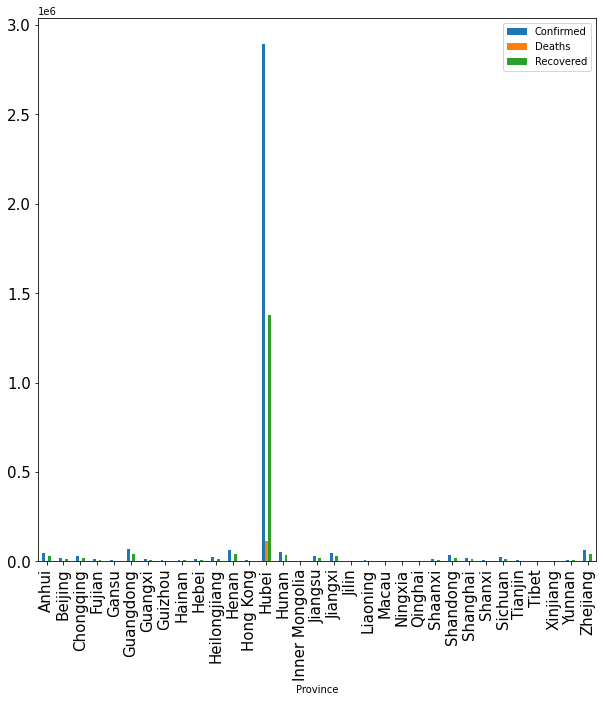

In [40]:
#### From above graphs we can observe the confirmed cases and deaths are increasing and the recovery cases are not that great, but quiet doing well.If the Confirmed cases decrease then the Recovery cases increases, means the medicine for this cases can be increased.

##china details
df_china=df[df['Country']=='China'][['Province','Confirmed','Deaths','Recovered']]

df_china.head(2)

df_china=df_china.groupby('Province')[['Confirmed','Deaths','Recovered']].sum()

df_china.reset_index(inplace=True)

df_china.head(2)

df_china.plot('Province',['Confirmed','Deaths','Recovered'],kind='bar',figsize=(10,10),fontsize=15)

Confirmed   444.00
Deaths       17.00
Recovered    28.00
Name: 154, dtype: float64

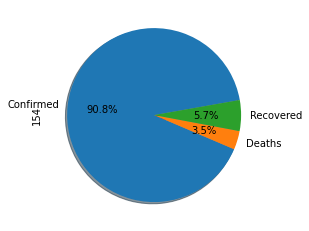

In [41]:
hubei=df[df['Province']=='Hubei']

hubei=hubei[['Confirmed','Deaths','Recovered']]

hubei = hubei.iloc[0]

hubei

hubei.plot(kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=10)

In [42]:
plot = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Deaths", "Recovered"))
hubei=df[df['Province']=='Hubei']
scatterPlotCasesOverTime(hubei,"<b>Hibei</b>")

In [0]:
##Rest of hubei

In [0]:
rest_of_china=df_china[df_china['Province']!='Hubei'][['Province','Confirmed','Deaths','Recovered']]

In [58]:
rest_of_china.groupby('Province')[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Province,Confirmed,Deaths,Recovered
0,Anhui,47647.00,251.00,31689.00
1,Beijing,20967.00,282.00,10995.00
2,Chongqing,28659.00,257.00,17967.00
3,Fujian,14916.00,33.00,9334.00
4,Gansu,5276.00,89.00,3397.00
5,Guangdong,67015.00,265.00,41319.00
6,Guangxi,12352.00,84.00,7187.00
7,Guizhou,6845.00,83.00,4428.00
8,Hainan,8244.00,237.00,5347.00
9,Hebei,14773.00,244.00,10433.00


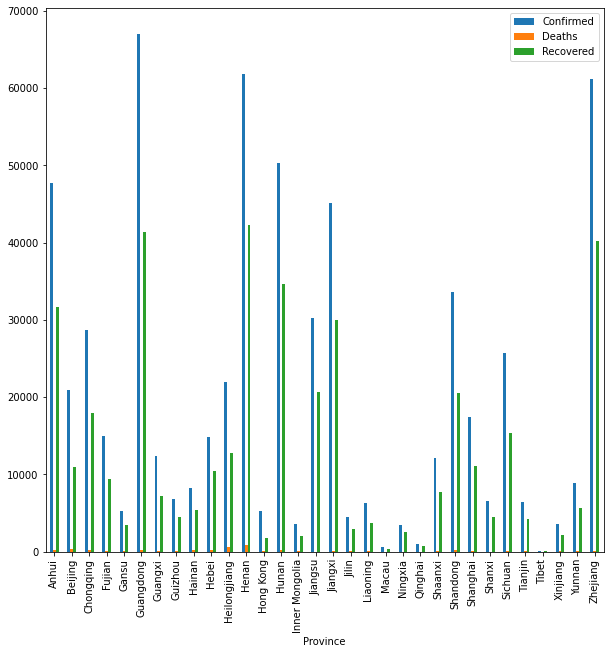

In [59]:
rest_of_china.plot('Province',['Confirmed','Deaths','Recovered'],kind='bar',figsize=(10,10))

In [61]:
print(rest_of_china[rest_of_china['Confirmed']>0])

          Province  Confirmed  Deaths  Recovered
0            Anhui   47647.00  251.00   31689.00
1          Beijing   20967.00  282.00   10995.00
2        Chongqing   28659.00  257.00   17967.00
3           Fujian   14916.00   33.00    9334.00
4            Gansu    5276.00   89.00    3397.00
5        Guangdong   67015.00  265.00   41319.00
6          Guangxi   12352.00   84.00    7187.00
7          Guizhou    6845.00   83.00    4428.00
8           Hainan    8244.00  237.00    5347.00
9            Hebei   14773.00  244.00   10433.00
10    Heilongjiang   21991.00  558.00   12807.00
11           Henan   61811.00  856.00   42245.00
12       Hong Kong    5221.00  110.00    1783.00
14           Hunan   50256.00  158.00   34574.00
15  Inner Mongolia    3594.00   21.00    2005.00
16         Jiangsu   30272.00    0.00   20649.00
17         Jiangxi   45181.00   43.00   30017.00
18           Jilin    4421.00   46.00    2955.00
19        Liaoning    6277.00   45.00    3760.00
20           Macau  